# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano; **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. Není potřeba používat sofistikované metody. _Hlavně pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model (jednoznačně popište o který konkrétně jde) a správně odhadněte, jakou **přesnost** můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **survived** a identifikátory do sloupce **ID** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

      * Snažte se vše udělat tak, aby přesnost odevzdaných predikcí na vyhodocovacím datasetu byla alespoň **75%**. Pokud bude menší, přijdete o **3 body**.
      * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami survived):
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [31]:
# Váš kód zde
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# First I'll print out general ovewview of dataset
df = pd.read_csv('01/data.csv')
print("\nDataset information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        796 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      225 non-null    object 
 11  embarked   1000 non-null   object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB
None

Missing values:
ID             0
survived       0
pclass         0
name           0
sex            0
age          204
sibsp          0
parch          0
ticket         0
fare           0
cabin        775

In [ ]:
#We split data before preprocessing them avoiding data leakage. I chode 60:20:20 ratio
random_value = 42 #seed value
train_val, test = train_test_split(df, test_size=0.2, random_state=random_value)
train, val = train_test_split(train_val, test_size=0.25, random_state=random_value)

In [ ]:
# In This cell I will make a preprocessing function
def preprocess_data(data, is_training=False, scaler=None):
    df = data.copy()  
    # I'll fill out missing values.
    df['age'] = df['age'].fillna(-1)
    df['fare'] = df['fare'].fillna(-1)   
    # Categorical to numeric
    df['sex'] = (df['sex'] == 'female').astype(int)
    # I will try to group number of siblings and parents together
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    df['is_alone'] = (df['family_size'] == 1).astype(int)
    # I do not consider these values to have a meaningful predictive value so I'm dropping them.
    columns_to_drop = ['ID', 'name', 'ticket', 'cabin', 'embarked', 
                      'home.dest', 'sibsp', 'parch']
    df = df.drop(columns_to_drop, axis=1, errors='ignore')

    # I will use standard scaler to scale numerical data to prevent bias in knn.
    numerical_columns = ['fare', 'family_size', 'age']
    if is_training:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])
    
    if 'survived' in df.columns:
        X = df.drop('survived', axis=1)
        y = df['survived']
        return X, y, scaler
    else:
        return df, None, scaler

Columns after dropping:
'survived', 'pclass', 'sex', 'age', 'fare', 'family_size', 'is_alone'

I've tried to use e.g. one hot encoding on embarked column etc. because there was difference in survival rate for given ports. But the model was not affected by it in any significant way so I expect it wasn't the primary driver of chaging surival rate.


Best parameters: {'max_depth': 3, 'criterion': 'entropy'}
Accuracy score (train): 0.8000
Accuracy score (validation): 0.8200
F1 Score: 0.7632
AUC Score: 0.8578


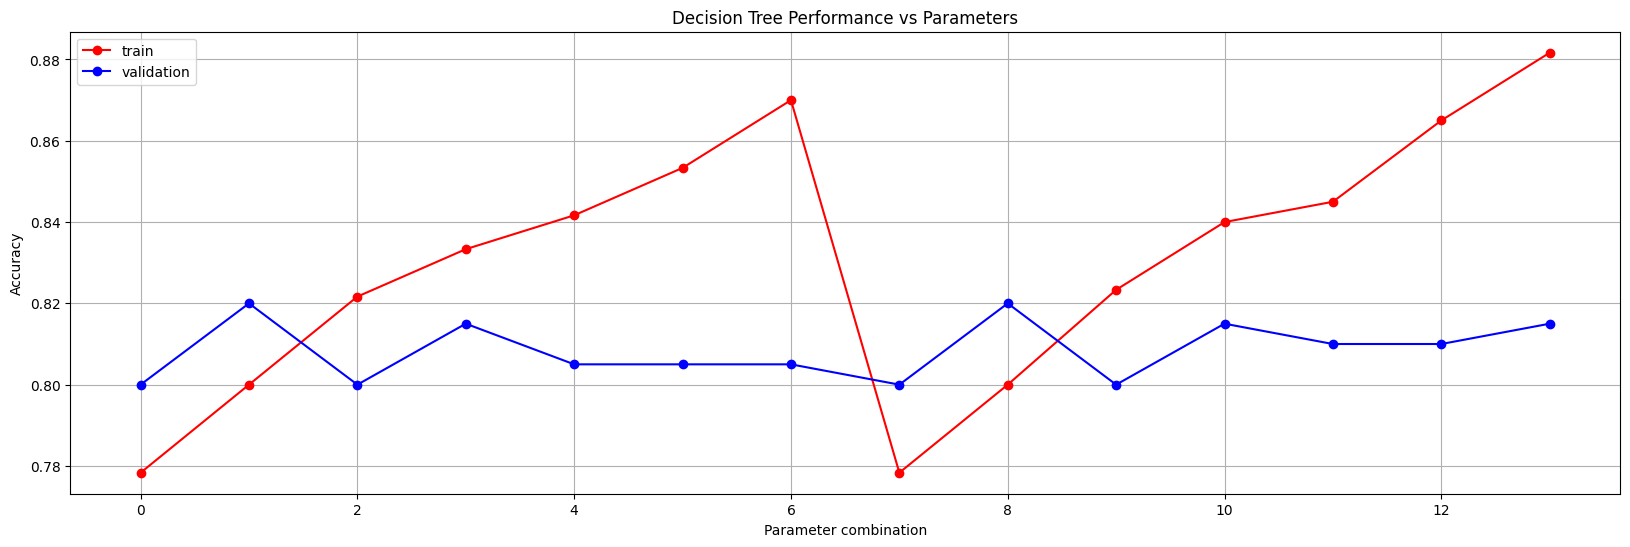

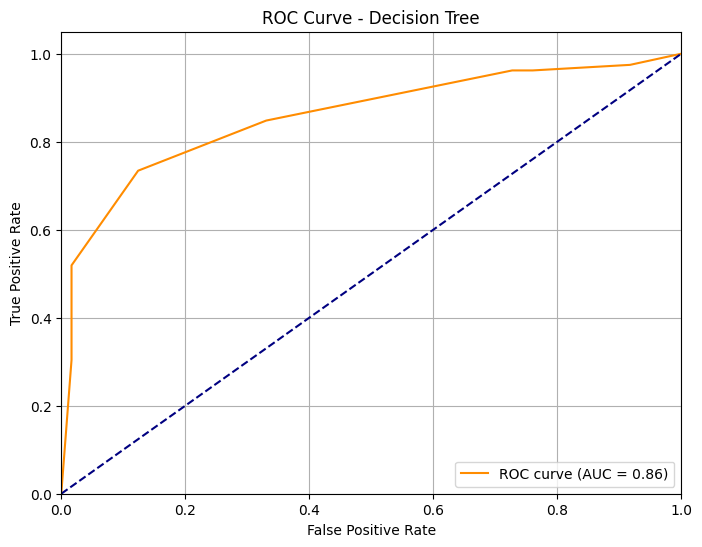


Feature Importance:
       feature  importance
1          sex    0.599710
0       pclass    0.156770
3         fare    0.116978
4  family_size    0.109914
2          age    0.016628
5     is_alone    0.000000


In [ ]:
# Imlementation of Decision Tree
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

X_train, y_train, scaler = preprocess_data(train, is_training=True)
X_val, y_val, _ = preprocess_data(val, is_training=False, scaler=scaler)
param_grid = {
    'max_depth': range(2, 9),
    'criterion': ['entropy', 'gini']
}
train_acc = []
val_acc = []
param_comb = ParameterGrid(param_grid)
# Get model for each combination of params
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], 
                              criterion=params['criterion'],
                              random_state=random_value)
    dt.fit(X_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, dt.predict(X_train)))
    val_acc.append(metrics.accuracy_score(y_val, dt.predict(X_val)))


best_params = param_comb[np.argmax(val_acc)]
print('\nBest parameters:', best_params)

# Train final model with best parameters
dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                          criterion=best_params['criterion'],
                          random_state=random_value)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
y_pred_proba = dt.predict_proba(X_val)[:, 1]

accuracy = metrics.accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot results
plt.figure(figsize=(20,6))
plt.plot(train_acc, 'or-', label='train')
plt.plot(val_acc, 'ob-', label='validation')
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Decision Tree Performance vs Parameters')

print('Accuracy score (train): {:.4f}'.format(metrics.accuracy_score(y_train, dt.predict(X_train))))
print('Accuracy score (validation): {:.4f}'.format(accuracy))
print('F1 Score: {:.4f}'.format(f1))
print('AUC Score: {:.4f}'.format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# I printed out importance of features to see what factors were most important
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt.feature_importances_
})
print('\nFeature Importance:')
print(importance.sort_values('importance', ascending=False))

I was thinking how to comment my results from the decision tree classifier. I was looking if there are any metrics I could use and found the feature_importance method which compared entropy/gini improvement by using different colums as splits.

#Apparently biggest predictive value comes from sex of the passenger. Far behind it is pclass, fare and family size. Other factors are insignificant. We've managed to avoid larger overfitting.
#The best hyperparameters are depth of 3 and usage of entropy. For validation data, the results are pretty consistent.

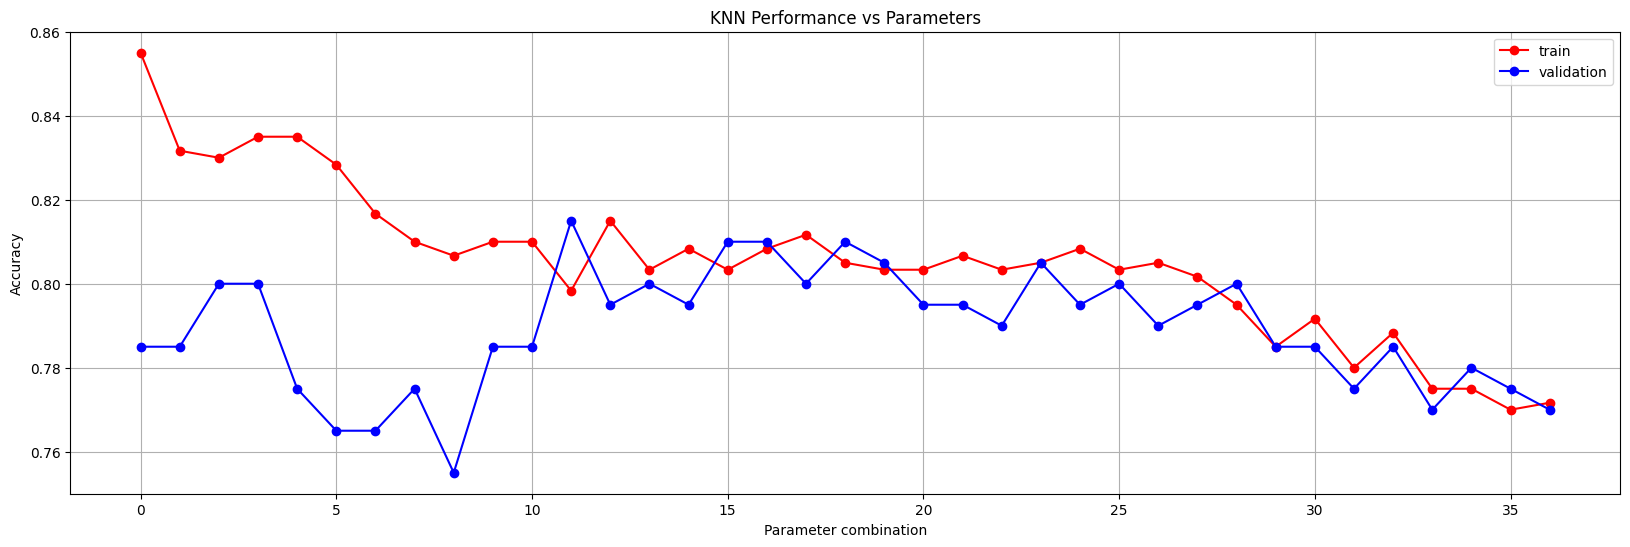


Best parameters: {'weights': 'uniform', 'n_neighbors': 14, 'metric': 'manhattan'}
Accuracy score (train): 0.7983
Accuracy score (validation): 0.8150
F1 Score: 0.7413
AUC Score: 0.8643


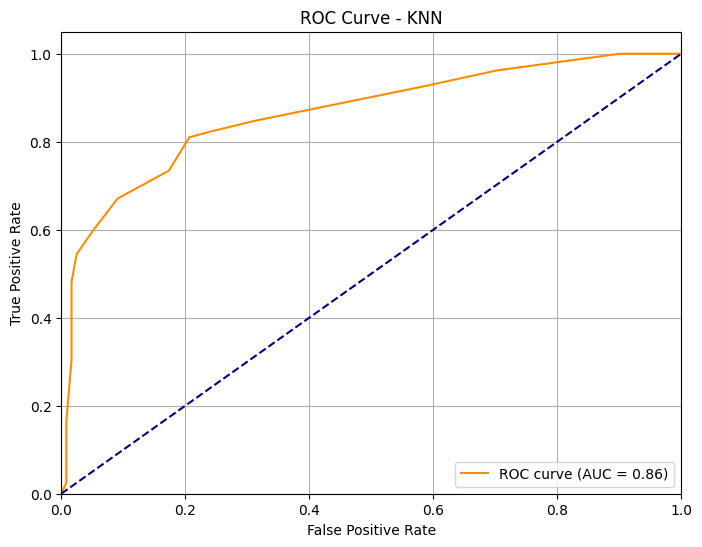

In [ ]:
# Here I will implement KNN
X_train, y_train, scaler = preprocess_data(train, is_training=True)
X_val, y_val, _ = preprocess_data(val, is_training=False, scaler=scaler)

param_grid = {
    'n_neighbors': range(3, 40), 
    'weights': ['uniform'],
    'metric': ['manhattan']
}

train_acc = []
val_acc = []
param_comb = ParameterGrid(param_grid)

for params in param_comb:
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, knn.predict(X_train)))
    val_acc.append(metrics.accuracy_score(y_val, knn.predict(X_val)))

best_params = param_comb[np.argmax(val_acc)]
print('\nBest parameters:', best_params)
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)
y_pred_proba = knn.predict_proba(X_val)[:, 1]

accuracy = metrics.accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20,6))
plt.plot(train_acc, 'or-', label='train')
plt.plot(val_acc, 'ob-', label='validation')
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('KNN Performance vs Parameters')
plt.show()

print('Accuracy score (train): {:.4f}'.format(metrics.accuracy_score(y_train, knn.predict(X_train))))
print('Accuracy score (validation): {:.4f}'.format(accuracy))
print('F1 Score: {:.4f}'.format(f1))
print('AUC Score: {:.4f}'.format(roc_auc))

# ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

KNN method achieves slightly higher in AUC metric while getting slightly lower score in F1 and accuracy metric. Difference between training and validation sets is smaller in KNN. We're getting pretty consistent results on
validation subset. With increasing k-number the model starts failing down in accuracy. There doesn't seem to be issue with overfitting on either of those.

I chose to use KNN for the final model as it had slightly higher AUC score and less overfitting. KNN is also considered less sensitive to changes in data compare to decision 
tree classifier. Therefore I will use KNN model to evaluate testing data as 
well as evaluation.csv

I've been trying to adjust what columns to use to achieve best model across as many matrics as possible. To my surprise dropping most columns didn't hurt the matrics. 
It seems like the strongest predictive value lies
in the passengers' sex and pclass. Other factors like age or family members had much smaller predictive value. Others barely changed the model's accuracy.
Dropping unnecessary columns slighly increased KNN accuracy and AUC while not changing Decision tree's accuracy and AUC. Creating categories family_size and is_alone slightly improved the model and so I used them instead of parch and sibsp.

In [ ]:
# Evaluating testing data
X_test, y_test, _ = preprocess_data(test, is_training=False, scaler=scaler)
y_test_pred = knn.predict(X_test)
y_test_proba = knn.predict_proba(X_test)[:, 1]
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("KNN Performance on Test Set:")
print(f"Accuracy on new data: {test_accuracy:.4f}")



KNN Performance on Test Set:
Accuracy on new data: 0.8150


Apparently, we can expect accuracy on new data to be 0.8150.

In [ ]:
# Final evaluation of evaluation.csv
eval_data = pd.read_csv('01/evaluation.csv')
X_eval, _, _ = preprocess_data(eval_data, is_training=False, scaler=scaler)
# final prediction
predictions = knn.predict(X_eval)
results = pd.DataFrame({'ID': eval_data['ID'], 'survived': predictions})
results.to_csv('01/results.csv', index=False)